In [96]:
import pandas as pd
import numpy as np
file_path = r"C:\Users\esram\OneDrive\Desktop\esrabecode\immo-eliza-ml\data\immovlan_cleaned_file.csv"
df = pd.read_csv(file_path, encoding='utf-8')


In [97]:
df.shape

(16309, 33)

In [98]:
df.head(20)

,url,Property ID,Price,State of the property,Availability,Number of bedrooms,Livable surface,Furnished,Attic,Garage,...,Surface terrace,Total land surface,Swimming pool,type,postal_code,city,Region,province,price_per_sqm,Price_per_sqm_land
0,https://immovlan.be/en/detail/studio/for-sale/...,vbd20021,175000.0,New,On contract,0.0,51.0,NaN,NaN,NaN,...,NaN,NaN,NaN,studio,4000,liege,Wallonia,Liege,3431.372549,NaN
1,https://immovlan.be/en/detail/apartment/for-sa...,vbd30235,415000.0,New,On contract,1.0,70.0,0.0,NaN,1.0,...,20.0,NaN,1.0,apartment,1410,waterloo,Wallonia,Walloon Brabant,5928.571429,NaN
2,https://immovlan.be/en/detail/residence/for-sa...,vbd46297,399000.0,NaN,NaN,2.0,129.0,NaN,NaN,1.0,...,NaN,NaN,NaN,residence,1501,buizingen,Flanders,Flemish Brabant,3093.023256,NaN
3,https://immovlan.be/en/detail/apartment/for-sa...,vbd36813,229000.0,New,NaN,2.0,82.0,NaN,NaN,NaN,...,8.0,NaN,NaN,apartment,7000,mons,Wallonia,Hainaut,2792.682927,NaN
4,https://immovlan.be/en/detail/apartment/for-sa...,vbb60643,320000.0,New,NaN,3.0,106.0,NaN,NaN,NaN,...,6.0,NaN,NaN,apartment,7000,mons,Wallonia,Hainaut,3018.867925,NaN
5,https://immovlan.be/en/detail/apartment/for-sa...,vbd46661,185000.0,Excellent,NaN,1.0,56.0,0.0,NaN,NaN,...,7.0,NaN,NaN,apartment,1400,nivelles,Wallonia,Walloon Brabant,3303.571429,NaN
6,https://immovlan.be/en/detail/residence/for-sa...,vbd11776,190000.0,NaN,NaN,5.0,142.0,0.0,1.0,1.0,...,NaN,320.0,NaN,residence,6830,bouillon,Wallonia,Luxembourg,1338.028169,593.750000
7,https://immovlan.be/en/detail/apartment/for-sa...,vbd48568,NaN,New,NaN,4.0,167.0,0.0,NaN,NaN,...,NaN,NaN,NaN,apartment,1300,wavre,Wallonia,Walloon Brabant,NaN,NaN
8,https://immovlan.be/en/detail/apartment/for-sa...,vbd36992,329000.0,New,NaN,3.0,113.0,NaN,NaN,NaN,...,9.0,NaN,NaN,apartment,1480,tubize,Wallonia,Walloon Brabant,2911.504425,NaN
9,https://immovlan.be/en/detail/residence/for-sa...,rbu64988,327850.0,To be renovated,On contract,3.0,185.0,0.0,1.0,1.0,...,21.0,683.0,0.0,residence,9810,nazareth,Flanders,East Flanders,1772.162162,480.014641


In [99]:
df.shape

(16309, 33)

## Check duplicates rows and unique value IDs

In [100]:
# check 1: Duplicate rows 
duplicate_rows = df.duplicated().sum()
print(f"\n1. Exact duplicate rows: {duplicate_rows}")

# check 2: Duplicate property IDs
if 'Property ID' in df.columns:
    duplicate_ids = df['Property ID'].duplicated().sum()
    print(f"2. Duplicate Property IDs: {duplicate_ids}")

duplicate_remove = df.drop_duplicates()
print(duplicate_remove.shape)


1. Exact duplicate rows: 0
2. Duplicate Property IDs: 0
(16309, 33)


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16309 entries, 0 to 16308
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    16309 non-null  object 
 1   Property ID            16309 non-null  object 
 2   Price                  15725 non-null  float64
 3   State of the property  11846 non-null  object 
 4   Availability           7001 non-null   object 
 5   Number of bedrooms     14083 non-null  float64
 6   Livable surface        13294 non-null  float64
 7   Furnished              8383 non-null   float64
 8   Attic                  3661 non-null   float64
 9   Garage                 7044 non-null   float64
 10  Number of garages      3799 non-null   float64
 11  Kitchen equipment      4380 non-null   object 
 12  Kitchen type           2181 non-null   object 
 13  Number of bathrooms    12042 non-null  float64
 14  Number of showers      3538 non-null   float64
 15  Nu

In [102]:
df.describe()

,Price,Number of bedrooms,Livable surface,Furnished,Attic,Garage,Number of garages,Number of bathrooms,Number of showers,Number of toilets,...,Number of facades,Garden,Surface garden,Terrace,Surface terrace,Total land surface,Swimming pool,postal_code,price_per_sqm,Price_per_sqm_land
count,1.572500e+04,14083.000000,13294.000000,8383.000000,3661.000000,7044.0,3799.000000,12042.000000,3538.000000,10014.000000,...,9817.000000,12786.000000,2731.000000,13588.000000,7448.000000,6990.000000,3920.000000,16309.000000,12762.000000,6846.000000
mean,3.773196e+05,2.711425,174.536558,0.026482,0.878449,1.0,3.100816,1.348613,1.743358,1.699221,...,2.844453,0.586892,889.402417,0.849500,24.384264,1424.949356,0.084694,4632.011834,3507.402525,1118.877212
std,3.298409e+05,1.528809,3654.193163,0.160574,0.326812,0.0,46.223951,0.962744,12.549083,1.204956,...,0.841291,0.492411,5488.540179,0.357574,108.607371,7174.879643,0.278461,2670.017829,13010.652230,2392.142557
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1000.000000,0.008065,0.060000
25%,2.350000e+05,2.000000,89.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,2.000000,0.000000,77.000000,1.000000,9.000000,262.000000,0.000000,2100.000000,2147.058824,275.477757
50%,3.190000e+05,3.000000,116.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,225.000000,1.000000,15.000000,557.000000,0.000000,4280.000000,2934.363781,635.496214
75%,4.320000e+05,3.000000,169.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,2.000000,...,4.000000,1.000000,615.500000,1.000000,25.000000,1156.750000,0.000000,6820.000000,3594.929640,1319.790373
max,1.382760e+07,50.000000,421300.000000,1.000000,1.000000,1.0,2024.000000,50.000000,482.000000,50.000000,...,4.000000,1.000000,200000.000000,1.000000,5331.000000,500000.000000,1.000000,9991.000000,386050.000000,77800.000000


In [103]:
df.isna().sum()


url                          0
Property ID                  0
Price                      584
State of the property     4463
Availability              9308
Number of bedrooms        2226
Livable surface           3015
Furnished                 7926
Attic                    12648
Garage                    9265
Number of garages        12510
Kitchen equipment        11929
Kitchen type             14128
Number of bathrooms       4267
Number of showers        12771
Number of toilets         6295
Type of heating           6966
Type of glazing           9232
Elevator                  5486
Number of facades         6492
Garden                    3523
Surface garden           13578
Terrace                   2721
Surface terrace           8861
Total land surface        9319
Swimming pool            12389
type                         0
postal_code                  0
city                         0
Region                       0
province                     0
price_per_sqm             3547
Price_pe

## Check for whitespace - 

lambda x: isinstance(x, str) and x != x.strip() <br>
For each cell x in the DataFrame: <br>
isinstance(x, str) → checks if the cell contains a string. <br>
x.strip() → removes leading/trailing whitespace. <br>
x != x.strip() → will be True if trimming changes the value (i.e., whitespace existed). <br>

In [104]:
has_whitespace = df.map(lambda x: isinstance(x, str) and x != x.strip()).any().any()
print("Contains whitespace?", has_whitespace)

Contains whitespace? False


## Check Data Types

In [105]:

df.info(show_counts=True, memory_usage=True, verbose=True)
df_obj = df.select_dtypes(include=['object'])
print(df_obj.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16309 entries, 0 to 16308
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    16309 non-null  object 
 1   Property ID            16309 non-null  object 
 2   Price                  15725 non-null  float64
 3   State of the property  11846 non-null  object 
 4   Availability           7001 non-null   object 
 5   Number of bedrooms     14083 non-null  float64
 6   Livable surface        13294 non-null  float64
 7   Furnished              8383 non-null   float64
 8   Attic                  3661 non-null   float64
 9   Garage                 7044 non-null   float64
 10  Number of garages      3799 non-null   float64
 11  Kitchen equipment      4380 non-null   object 
 12  Kitchen type           2181 non-null   object 
 13  Number of bathrooms    12042 non-null  float64
 14  Number of showers      3538 non-null   float64
 15  Nu

## Checking for missing values

In [106]:

missing_count = df.isnull().sum()
display(missing_count)

url                          0
Property ID                  0
Price                      584
State of the property     4463
Availability              9308
Number of bedrooms        2226
Livable surface           3015
Furnished                 7926
Attic                    12648
Garage                    9265
Number of garages        12510
Kitchen equipment        11929
Kitchen type             14128
Number of bathrooms       4267
Number of showers        12771
Number of toilets         6295
Type of heating           6966
Type of glazing           9232
Elevator                  5486
Number of facades         6492
Garden                    3523
Surface garden           13578
Terrace                   2721
Surface terrace           8861
Total land surface        9319
Swimming pool            12389
type                         0
postal_code                  0
city                         0
Region                       0
province                     0
price_per_sqm             3547
Price_pe

In [107]:
df.head()

,url,Property ID,Price,State of the property,Availability,Number of bedrooms,Livable surface,Furnished,Attic,Garage,...,Surface terrace,Total land surface,Swimming pool,type,postal_code,city,Region,province,price_per_sqm,Price_per_sqm_land
0,https://immovlan.be/en/detail/studio/for-sale/...,vbd20021,175000.0,New,On contract,0.0,51.0,NaN,NaN,NaN,...,NaN,NaN,NaN,studio,4000,liege,Wallonia,Liege,3431.372549,NaN
1,https://immovlan.be/en/detail/apartment/for-sa...,vbd30235,415000.0,New,On contract,1.0,70.0,0.0,NaN,1.0,...,20.0,NaN,1.0,apartment,1410,waterloo,Wallonia,Walloon Brabant,5928.571429,NaN
2,https://immovlan.be/en/detail/residence/for-sa...,vbd46297,399000.0,NaN,NaN,2.0,129.0,NaN,NaN,1.0,...,NaN,NaN,NaN,residence,1501,buizingen,Flanders,Flemish Brabant,3093.023256,NaN
3,https://immovlan.be/en/detail/apartment/for-sa...,vbd36813,229000.0,New,NaN,2.0,82.0,NaN,NaN,NaN,...,8.0,NaN,NaN,apartment,7000,mons,Wallonia,Hainaut,2792.682927,NaN
4,https://immovlan.be/en/detail/apartment/for-sa...,vbb60643,320000.0,New,NaN,3.0,106.0,NaN,NaN,NaN,...,6.0,NaN,NaN,apartment,7000,mons,Wallonia,Hainaut,3018.867925,NaN


## Regions 
A. Deterministic postcode -> region mapping 

In [108]:
import pandas as pd

file_path = r"C:\Users\esram\OneDrive\Desktop\esrabecode\immo-eliza-ml\data\immovlan_cleaned_file_final.csv"

df = pd.read_csv(file_path, encoding="utf-8")


In [109]:
def postcode_to_region(pc):
    if pd.isna(pc):
        return "Unknown"
    pc = int(pc)

    # Brussels
    if 1000 <= pc <= 1299:
        return "Brussels"

    # Wallonia
    if 1300 <= pc <= 1499:
        return "Wallonia"
    if 4000 <= pc <= 7999:
        return "Wallonia"

    # Flanders
    if 1500 <= pc <= 3999:
        return "Flanders"
    if 8000 <= pc <= 9999:
        return "Flanders"

    return "Unknown"

df["Region"] = df["postal_code"].apply(postcode_to_region)

# Test 
print("Region distribution:")
print(df["Region"].value_counts(dropna=False))

df.to_csv(file_path, index=False, encoding="utf-8")

Region distribution:
Region
Wallonia    8142
Flanders    6724
Brussels    1443
Name: count, dtype: int64


B. Map postcode to province

In [110]:
import pandas as pd

file_path = r"C:\Users\esram\OneDrive\Desktop\esrabecode\immo-eliza-ml\data\immovlan_cleaned_file_final.csv"

df = pd.read_csv(file_path, encoding="utf-8")


In [111]:
provinces = {
    "brussels": list(range(1000, 1300)),
    "brabant_walloon": list(range(1300, 1500)),
    "brabant_flemish": list(range(1500, 2000)) + list(range(3000, 3500)),
    "antwerp": list(range(2000, 3000)),
    "limburg": list(range(3500, 4000)),
    "liege": list(range(4000, 4500)),
    "namur": list(range(4500, 5681)),
    "hainaut": list(range(5681, 6600)) + list(range(7000, 8000)),
    "luxembourg": list(range(6600, 7000)),
    "west_flanders": list(range(8000, 9000)),
    "east_flanders": list(range(9000, 10000))
}
def postcode_to_province(postcode):
    # Brussels
    if postcode in provinces["brussels"]:
        return "Brussels"
    # Walloon Brabant
    if postcode in provinces["brabant_walloon"]:
        return "Walloon Brabant"
    # Flemish Brabant
    if postcode in provinces["brabant_flemish"]:
        return "Flemish Brabant"
    # Antwerp
    if postcode in provinces["antwerp"]:
        return "Antwerp"
    # Limburg
    if postcode in provinces["limburg"]:
        return "Limburg"

    # Liege
    if postcode in provinces["liege"]:
        return "Liege"

    # Namur
    if postcode in provinces["namur"]:
        return "Namur"

    # Hainaut
    if postcode in provinces["hainaut"]:
        return "Hainaut"

    # Luxembourg
    if postcode in provinces["luxembourg"]:
        return "Luxembourg"

    # West Flanders
    if postcode in provinces["west_flanders"]:
        return "West Flanders"

    # East Flanders
    if postcode in provinces["east_flanders"]:
        return "East Flanders"

    return "Unknown"

df["province"] = df["postal_code"].apply(postcode_to_province)

print("Provinces distribution:")
print(df["province"].value_counts(dropna=False))

df.to_csv(file_path, index=False, encoding="utf-8")

Provinces distribution:
province
Namur              2447
Walloon Brabant    1625
Hainaut            1503
Limburg            1502
Brussels           1443
Antwerp            1408
Luxembourg         1387
West Flanders      1293
Flemish Brabant    1283
East Flanders      1238
Liege              1180
Name: count, dtype: int64


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16309 entries, 0 to 16308
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Property ID            16309 non-null  object 
 1   Price                  15725 non-null  float64
 2   State of the property  11846 non-null  object 
 3   Number of bedrooms     14083 non-null  float64
 4   Livable surface        13294 non-null  float64
 5   Garage                 7044 non-null   float64
 6   Number of garages      3799 non-null   float64
 7   Type of heating        9343 non-null   object 
 8   Type of glazing        7077 non-null   object 
 9   Elevator               10823 non-null  float64
 10  Garden                 12786 non-null  float64
 11  Terrace                13588 non-null  float64
 12  Surface terrace        7448 non-null   float64
 13  Total land surface     6990 non-null   float64
 14  Swimming pool          3920 non-null   float64
 15  ty

In [113]:
df.shape

(16309, 23)

In [114]:
import pandas as pd

file_path = r"C:\Users\esram\OneDrive\Desktop\esrabecode\immo-eliza-ml\data\immovlan_cleaned_file_final.csv"

df = pd.read_csv(file_path, encoding="utf-8")


df["price_per_sqm"] = df["Price"] / df["Livable surface"]
df['Price_per_sqm_land'] = df['Price'] / df['Total land surface']

df.to_csv(file_path, index=False, encoding="utf-8")

##Main type grouping

In [115]:
import pandas as pd

file_path = r"C:\Users\esram\OneDrive\Desktop\esrabecode\immo-eliza-ml\data\immovlan_cleaned_file_final.csv"
df = pd.read_csv(file_path, encoding="utf-8")

apartment_subtypes = ["apartment", "ground floor", "penthouse", "studio", "duplex", "loft", "triplex", "student flat"]
house_subtypes = ["Residence", "Villa", "Mixed Building", "Master House", "Cottage", "Bungalow", "Chalet", "Mansion"]
business_subtypes = ['commercial building', 'industrial building', 'office space', 'business surface', 'garage', 'parking']
investment_subtypes = ['investment property']
land_subtypes = ['land', 'development site', 'farming site', 'farmland', 'industrial ground', 'wood', 'green zone', 'recreational land', 'to parcel out site']

def normalize_string(s):
    return str(s).strip().lower().replace('-', ' ')

mapping = {normalize_string(x): "apartment" for x in apartment_subtypes}
mapping.update({normalize_string(x): "house" for x in house_subtypes})
mapping.update({normalize_string(x): "business" for x in business_subtypes})
mapping.update({normalize_string(x): "investment property" for x in investment_subtypes})
mapping.update({normalize_string(x): "land" for x in land_subtypes})

df['main_type'] = df['type'].apply(lambda t: mapping.get(normalize_string(t), t))


df.to_csv(file_path, index=False, encoding="utf-8")

unmapped = df[df['main_type'] == df['type']]['type'].unique()
print("not matched:", unmapped)
print(df[['type', 'main_type']].head(20))


not matched: ['apartment' 'land' 'undetermined-property' 'other']
                   type            main_type
0                studio            apartment
1             apartment            apartment
2             residence                house
3             apartment            apartment
4             apartment            apartment
5             apartment            apartment
6             residence                house
7             apartment            apartment
8             apartment            apartment
9             residence                house
10  investment-property  investment property
11            apartment            apartment
12            apartment            apartment
13            apartment            apartment
14            residence                house
15            apartment            apartment
16            apartment            apartment
17            apartment            apartment
18            residence                house
19            residence           

In [116]:
ad_types = df[['main_type', 'type']]
ad_types.groupby(['main_type', 'type']).value_counts()

main_type              type                 
apartment              apartment                6598
                       duplex                    211
                       ground-floor              309
                       loft                       32
                       penthouse                 318
                       student-flat               22
                       studio                    217
                       triplex                    20
business               business-surface           45
                       commercial-building       439
                       garage                     99
                       industrial-building       172
                       office-space              123
                       parking                    79
house                  bungalow                   45
                       chalet                     68
                       cottage                    50
                       mansion                     6
 

In [117]:
df.columns

Index(['Property ID', 'Price', 'State of the property', 'Number of bedrooms',
       'Livable surface', 'Garage', 'Number of garages', 'Type of heating',
       'Type of glazing', 'Elevator', 'Garden', 'Terrace', 'Surface terrace',
       'Total land surface', 'Swimming pool', 'type', 'postal_code', 'city',
       'Region', 'province', 'main_type', 'price_per_sqm',
       'Price_per_sqm_land'],
      dtype='object')

In [118]:
df = df.dropna(subset=['Price'])


In [119]:
df.columns

Index(['Property ID', 'Price', 'State of the property', 'Number of bedrooms',
       'Livable surface', 'Garage', 'Number of garages', 'Type of heating',
       'Type of glazing', 'Elevator', 'Garden', 'Terrace', 'Surface terrace',
       'Total land surface', 'Swimming pool', 'type', 'postal_code', 'city',
       'Region', 'province', 'main_type', 'price_per_sqm',
       'Price_per_sqm_land'],
      dtype='object')

In [120]:
df = df.drop(['Property ID',
    'url','Availability','Attic','Kitchen equipment','Kitchen type',
    'Furnished','Price_per_sqm_land','price_per_sqm','Number of facades',
    'Number of bathrooms','Number of showers','Number of toilets',
    'Surface garden','Type of glazing',
], axis=1, errors='ignore')


In [121]:
df.shape

(15725, 19)

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# 0️⃣ Price <= 1 olanları kaldır
# -----------------------------
df = df[df['Price'] > 1]

# -----------------------------
# 1️⃣ Split: train / val / test
# -----------------------------
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns, index=y_train.index)
X_val_df   = pd.DataFrame(X_val, columns=X.columns, index=y_val.index)
X_test_df  = pd.DataFrame(X_test, columns=X.columns, index=y_test.index)

# -----------------------------
# 2️⃣ Missing value handling
# -----------------------------
zero_cols = ['Garage', 'Number of garages', 'Swimming pool', 
             'Terrace', 'Surface terrace','Elevator','Garden']

for col in zero_cols:
    for df_ in [X_train_df, X_val_df, X_test_df]:
        df_[col].fillna(0, inplace=True)

categorical_cols = ['Type of heating', 'State of the property']
for col in categorical_cols:
    for df_ in [X_train_df, X_val_df, X_test_df]:
        df_[col].fillna('unknown', inplace=True)

for df_ in [X_train_df, X_val_df, X_test_df]:
    df_['main_type'].fillna('unknown', inplace=True)

# Total land surface special handling
X_train_df.loc[X_train_df['main_type']=='apartment', 'Total land surface'].fillna(0, inplace=True)
X_val_df.loc[X_val_df['main_type']=='apartment', 'Total land surface'].fillna(0, inplace=True)
X_test_df.loc[X_test_df['main_type']=='apartment', 'Total land surface'].fillna(0, inplace=True)

house_median = X_train_df.loc[X_train_df['main_type']=='house', 'Total land surface'].median()
land_median  = X_train_df.loc[X_train_df['main_type']=='land', 'Total land surface'].median()
for df_ in [X_train_df, X_val_df, X_test_df]:
    df_.loc[(df_['main_type']=='house') & (df_['Total land surface'].isna()), 'Total land surface'] = house_median
    df_.loc[(df_['main_type']=='land') & (df_['Total land surface'].isna()), 'Total land surface'] = land_median

num_cols_for_median = ['Number of bedrooms', 'Livable surface', 'Total land surface']
for col in num_cols_for_median:
    median_dict = X_train_df.groupby('main_type')[col].median()
    for mtype, med_val in median_dict.items():
        for df_ in [X_train_df, X_val_df, X_test_df]:
            df_.loc[(df_['main_type']==mtype) & (df_[col].isna()), col] = med_val

for col in num_cols_for_median:
    median_val = X_train_df[col].median()
    for df_ in [X_train_df, X_val_df, X_test_df]:
        df_[col].fillna(median_val, inplace=True)

# -----------------------------
# 3️⃣ Outlier removal (train only)
# -----------------------------
from scipy import stats

outlier_num_cols = ['Number of bedrooms', 'Livable surface', 'Garage', 'Number of garages', 
                    'Terrace', 'Surface terrace', 'Total land surface', 'Swimming pool']

df_normal_train_list = []
df_extreme_train_list = []

y_train = y_train.reindex(X_train_df.index)
num_cols = outlier_num_cols.copy()

for mtype, group in X_train_df.groupby('main_type'):
    group_copy = group.copy()
    group_copy['Price'] = y_train.loc[group_copy.index]
    z_scores = np.abs(stats.zscore(group_copy[num_cols], nan_policy='omit'))
    outliers = (z_scores > 3).any(axis=1)
    df_normal_train_list.append(group_copy[~outliers])
    df_extreme_train_list.append(group_copy[outliers])

df_normal_train = pd.concat(df_normal_train_list)
df_extreme_train = pd.concat(df_extreme_train_list)

# -----------------------------
# 4️⃣ Features / target (outlier sonrası)
# -----------------------------
X_tr = df_normal_train.drop('Price', axis=1)
y_tr = df_normal_train['Price']

X_val_copy = X_val_df.copy()
X_test_copy = X_test_df.copy()

# -----------------------------
# 5️⃣ Encoding categorical variables
# -----------------------------
cat_cols = ['State of the property', 'Type of heating','type', 
            'city', 'Region', 'province', 'main_type']
cat_cols_existing = [c for c in cat_cols if c in X_tr.columns]

X_tr_encoded = pd.get_dummies(X_tr, columns=cat_cols_existing, drop_first=True)
X_val_encoded = pd.get_dummies(X_val_copy, columns=cat_cols_existing, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_copy, columns=cat_cols_existing, drop_first=True)

train_cols = X_tr_encoded.columns
X_val_encoded = X_val_encoded.reindex(columns=train_cols, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=train_cols, fill_value=0)

# -----------------------------
# 6️⃣ Scaling numeric features
# -----------------------------
scaler = StandardScaler()
num_cols_scaled = ['Number of bedrooms', 'Livable surface', 'Number of garages', 
                   'Surface terrace', 'Total land surface']

X_tr_encoded[num_cols_scaled] = scaler.fit_transform(X_tr_encoded[num_cols_scaled])
X_val_encoded[num_cols_scaled] = scaler.transform(X_val_encoded[num_cols_scaled])
X_test_encoded[num_cols_scaled] = scaler.transform(X_test_encoded[num_cols_scaled])


C:\Users\esram\AppData\Local\Temp\ipykernel_11760\1438045281.py:85: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(group_copy[num_cols], nan_policy='omit'))
C:\Users\esram\AppData\Local\Temp\ipykernel_11760\1438045281.py:85: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(group_copy[num_cols], nan_policy='omit'))


Simple RF has best score

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# -----------------------------
# 8️⃣ Random Forest Regressor (log-transform yok)
# -----------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,  # Ağaç sayısı
    max_depth=None,    # Derinlik sınırlaması yok
    random_state=42,
    n_jobs=-1
)

# Log-transform yapmadan fit et
rf_model.fit(X_tr_encoded, y_tr)

# Tahminler
y_train_pred = rf_model.predict(X_tr_encoded)
y_val_pred   = rf_model.predict(X_val_encoded)
y_test_pred  = rf_model.predict(X_test_encoded)

# Değerlendirme fonksiyonu (doğrudan fiyat)
def evaluate(y_true, y_pred, label="Set"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} → RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Performans değerlendirmesi
evaluate(y_tr, y_train_pred, "Train")
evaluate(y_val, y_val_pred, "Validation")
evaluate(y_test, y_test_pred, "Test")


Train → RMSE: 61366.63, R²: 0.9455
Validation → RMSE: 167897.96, R²: 0.6527
Test → RMSE: 241331.68, R²: 0.6289


Random forest adjusted param

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# -----------------------------
# 8️⃣ Random Forest + RandomizedSearchCV
# -----------------------------
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,   # rastgele kombinasyon sayısı
    cv=3,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit (X_tr_encoded ve y_tr pipeline'dan geliyor)
random_search.fit(X_tr_encoded, y_tr)

best_rf = random_search.best_estimator_
print("En iyi parametreler:", random_search.best_params_)

# Tahminler
y_train_pred = best_rf.predict(X_tr_encoded)
y_val_pred   = best_rf.predict(X_val_encoded)
y_test_pred  = best_rf.predict(X_test_encoded)

# Değerlendirme fonksiyonu (sürüm uyumluluğu için squared parametresiz)
def evaluate(y_true, y_pred, label="Set"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # squared parametresiz
    r2 = r2_score(y_true, y_pred)
    print(f"{label} → RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Performans
evaluate(y_tr, y_train_pred, "Train")
evaluate(y_val, y_val_pred, "Validation")
evaluate(y_test, y_test_pred, "Test")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\esram\OneDrive\Desktop\esrabecode\immo-eliza-ml\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\esram\OneDrive\Desktop\esrabecode\immo-eliza-ml\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\esram\OneDrive\Desktop\esrabecode\immo-eliza-ml\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~

En iyi parametreler: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Train → RMSE: 63692.15, R²: 0.9413
Validation → RMSE: 177336.42, R²: 0.6126
Test → RMSE: 261242.19, R²: 0.5651


In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# -----------------------------
# 8️⃣ Random Forest + RandomizedSearchCV (optimize)
# -----------------------------
param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [20, 25, 30, 35],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=15,        # rastgele kombinasyon sayısı
    cv=3,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_tr_encoded, y_tr)

# En iyi model
best_rf = random_search.best_estimator_
print("En iyi parametreler:", random_search.best_params_)

# Tahminler
y_train_pred = best_rf.predict(X_tr_encoded)
y_val_pred   = best_rf.predict(X_val_encoded)
y_test_pred  = best_rf.predict(X_test_encoded)

# Değerlendirme fonksiyonu
def evaluate(y_true, y_pred, label="Set"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} → RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Performans
evaluate(y_tr, y_train_pred, "Train")
evaluate(y_val, y_val_pred, "Validation")
evaluate(y_test, y_test_pred, "Test")


Fitting 3 folds for each of 15 candidates, totalling 45 fits
En iyi parametreler: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}
Train → RMSE: 106024.11, R²: 0.8373
Validation → RMSE: 184660.85, R²: 0.5799
Test → RMSE: 268663.39, R²: 0.5400


SIMPLE RF + FEATURE ENG

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# -----------------------------
# 0️⃣ Price <= 1 olanları kaldır
# -----------------------------
df = df[df['Price'] > 1]

# -----------------------------
# 1️⃣ Split: train / val / test
# -----------------------------
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train_df = pd.DataFrame(X_train, columns=X.columns, index=y_train.index)
X_val_df   = pd.DataFrame(X_val, columns=X.columns, index=y_val.index)
X_test_df  = pd.DataFrame(X_test, columns=X.columns, index=y_test.index)

# -----------------------------
# 2️⃣ Missing value handling
# -----------------------------
zero_cols = ['Garage', 'Number of garages', 'Swimming pool', 
             'Terrace', 'Surface terrace','Elevator','Garden']

for col in zero_cols:
    for df_ in [X_train_df, X_val_df, X_test_df]:
        df_[col].fillna(0, inplace=True)

categorical_cols = ['Type of heating', 'State of the property']
for col in categorical_cols:
    for df_ in [X_train_df, X_val_df, X_test_df]:
        df_[col].fillna('unknown', inplace=True)

for df_ in [X_train_df, X_val_df, X_test_df]:
    df_['main_type'].fillna('unknown', inplace=True)

# Total land surface special handling
X_train_df.loc[X_train_df['main_type']=='apartment', 'Total land surface'].fillna(0, inplace=True)
X_val_df.loc[X_val_df['main_type']=='apartment', 'Total land surface'].fillna(0, inplace=True)
X_test_df.loc[X_test_df['main_type']=='apartment', 'Total land surface'].fillna(0, inplace=True)

house_median = X_train_df.loc[X_train_df['main_type']=='house', 'Total land surface'].median()
land_median  = X_train_df.loc[X_train_df['main_type']=='land', 'Total land surface'].median()
for df_ in [X_train_df, X_val_df, X_test_df]:
    df_.loc[(df_['main_type']=='house') & (df_['Total land surface'].isna()), 'Total land surface'] = house_median
    df_.loc[(df_['main_type']=='land') & (df_['Total land surface'].isna()), 'Total land surface'] = land_median

num_cols_for_median = ['Number of bedrooms', 'Livable surface', 'Total land surface']
for col in num_cols_for_median:
    median_dict = X_train_df.groupby('main_type')[col].median()
    for mtype, med_val in median_dict.items():
        for df_ in [X_train_df, X_val_df, X_test_df]:
            df_.loc[(df_['main_type']==mtype) & (df_[col].isna()), col] = med_val

for col in num_cols_for_median:
    median_val = X_train_df[col].median()
    for df_ in [X_train_df, X_val_df, X_test_df]:
        df_[col].fillna(median_val, inplace=True)

# -----------------------------
# 3️⃣ Outlier removal (train only)
# -----------------------------
outlier_num_cols = ['Number of bedrooms', 'Livable surface', 'Garage', 'Number of garages', 
                    'Terrace', 'Surface terrace', 'Total land surface', 'Swimming pool']

df_normal_train_list = []

y_train = y_train.reindex(X_train_df.index)
num_cols = outlier_num_cols.copy()

for mtype, group in X_train_df.groupby('main_type'):
    group_copy = group.copy()
    group_copy['Price'] = y_train.loc[group_copy.index]
    z_scores = np.abs(stats.zscore(group_copy[num_cols], nan_policy='omit'))
    outliers = (z_scores > 3).any(axis=1)
    df_normal_train_list.append(group_copy[~outliers])

df_normal_train = pd.concat(df_normal_train_list)

# -----------------------------
# 4️⃣ Features / target (outlier sonrası)
# -----------------------------
X_tr = df_normal_train.drop('Price', axis=1)
y_tr = df_normal_train['Price']

X_val_copy = X_val_df.copy()
X_test_copy = X_test_df.copy()

# -----------------------------
# 4.1️⃣ Feature Engineering
# -----------------------------
feat_eng_cols = ['has_swimming_pool', 'has_garden', 'has_terrace', 'surface_ratio', 'area_per_bedroom']

for df_ in [X_tr, X_val_copy, X_test_copy]:
    df_['has_swimming_pool'] = df_['Swimming pool'].apply(lambda x: 1 if x > 0 else 0)
    df_['has_garden'] = df_['Garden'].apply(lambda x: 1 if x > 0 else 0)
    df_['has_terrace'] = df_['Terrace'].apply(lambda x: 1 if x > 0 else 0)
    df_['surface_ratio'] = df_['Livable surface'] / df_['Total land surface'].replace(0,1)
    df_['area_per_bedroom'] = df_['Livable surface'] / df_['Number of bedrooms'].replace(0,1)

# -----------------------------
# 5️⃣ Encoding categorical variables
# -----------------------------
cat_cols = ['State of the property', 'Type of heating','type', 
            'city', 'Region', 'province', 'main_type']
cat_cols_existing = [c for c in cat_cols if c in X_tr.columns]

X_tr_encoded = pd.get_dummies(X_tr, columns=cat_cols_existing, drop_first=True)
X_val_encoded = pd.get_dummies(X_val_copy, columns=cat_cols_existing, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_copy, columns=cat_cols_existing, drop_first=True)

# Feature engineering sütunlarını ekle
for col in feat_eng_cols:
    X_tr_encoded[col] = X_tr[col]
    X_val_encoded[col] = X_val_copy[col]
    X_test_encoded[col] = X_test_copy[col]

# -----------------------------
# 5.1️⃣ Validation/Test reindex (train setine göre)
# -----------------------------
train_cols = X_tr_encoded.columns
X_val_encoded = X_val_encoded.reindex(columns=train_cols, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=train_cols, fill_value=0)

# -----------------------------
# 6️⃣ Random Forest Regressor
# -----------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_tr_encoded, y_tr)

y_train_pred = rf_model.predict(X_tr_encoded)
y_val_pred   = rf_model.predict(X_val_encoded)
y_test_pred  = rf_model.predict(X_test_encoded)

# -----------------------------
# 7️⃣ Değerlendirme
# -----------------------------
def evaluate(y_true, y_pred, label="Set"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} → RMSE: {rmse:.2f}, R²: {r2:.4f}")

evaluate(y_tr, y_train_pred, "Train")
evaluate(y_val, y_val_pred, "Validation")
evaluate(y_test, y_test_pred, "Test")


C:\Users\esram\AppData\Local\Temp\ipykernel_11760\3852248590.py:81: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(group_copy[num_cols], nan_policy='omit'))
C:\Users\esram\AppData\Local\Temp\ipykernel_11760\3852248590.py:81: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(group_copy[num_cols], nan_policy='omit'))


Train → RMSE: 61964.13, R²: 0.9444
Validation → RMSE: 165226.24, R²: 0.6637
Test → RMSE: 241447.71, R²: 0.6285


SIMPLE RF + FEATURE ENG - CITY GROUP

In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# -----------------------------
# 0️⃣ Price <= 1 olanları kaldır
# -----------------------------
df = df[df['Price'] > 1]

# -----------------------------
# 1️⃣ Split: train / val / test
# -----------------------------
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train_df = pd.DataFrame(X_train, columns=X.columns, index=y_train.index)
X_val_df   = pd.DataFrame(X_val, columns=X.columns, index=y_val.index)
X_test_df  = pd.DataFrame(X_test, columns=X.columns, index=y_test.index)

# -----------------------------
# 2️⃣ Missing value handling
# -----------------------------
zero_cols = ['Garage', 'Number of garages', 'Swimming pool', 
             'Terrace', 'Surface terrace','Elevator','Garden']

for col in zero_cols:
    for df_ in [X_train_df, X_val_df, X_test_df]:
        df_[col].fillna(0, inplace=True)

categorical_cols = ['Type of heating', 'State of the property']
for col in categorical_cols:
    for df_ in [X_train_df, X_val_df, X_test_df]:
        df_[col].fillna('unknown', inplace=True)

for df_ in [X_train_df, X_val_df, X_test_df]:
    df_['main_type'].fillna('unknown', inplace=True)

# Total land surface special handling
X_train_df.loc[X_train_df['main_type']=='apartment', 'Total land surface'].fillna(0, inplace=True)
X_val_df.loc[X_val_df['main_type']=='apartment', 'Total land surface'].fillna(0, inplace=True)
X_test_df.loc[X_test_df['main_type']=='apartment', 'Total land surface'].fillna(0, inplace=True)

house_median = X_train_df.loc[X_train_df['main_type']=='house', 'Total land surface'].median()
land_median  = X_train_df.loc[X_train_df['main_type']=='land', 'Total land surface'].median()
for df_ in [X_train_df, X_val_df, X_test_df]:
    df_.loc[(df_['main_type']=='house') & (df_['Total land surface'].isna()), 'Total land surface'] = house_median
    df_.loc[(df_['main_type']=='land') & (df_['Total land surface'].isna()), 'Total land surface'] = land_median

num_cols_for_median = ['Number of bedrooms', 'Livable surface', 'Total land surface']
for col in num_cols_for_median:
    median_dict = X_train_df.groupby('main_type')[col].median()
    for mtype, med_val in median_dict.items():
        for df_ in [X_train_df, X_val_df, X_test_df]:
            df_.loc[(df_['main_type']==mtype) & (df_[col].isna()), col] = med_val

for col in num_cols_for_median:
    median_val = X_train_df[col].median()
    for df_ in [X_train_df, X_val_df, X_test_df]:
        df_[col].fillna(median_val, inplace=True)

# -----------------------------
# 3️⃣ Outlier removal (train only)
# -----------------------------
outlier_num_cols = ['Number of bedrooms', 'Livable surface', 'Garage', 'Number of garages', 
                    'Terrace', 'Surface terrace', 'Total land surface', 'Swimming pool']

df_normal_train_list = []

y_train = y_train.reindex(X_train_df.index)
num_cols = outlier_num_cols.copy()

for mtype, group in X_train_df.groupby('main_type'):
    group_copy = group.copy()
    group_copy['Price'] = y_train.loc[group_copy.index]
    z_scores = np.abs(stats.zscore(group_copy[num_cols], nan_policy='omit'))
    outliers = (z_scores > 3).any(axis=1)
    df_normal_train_list.append(group_copy[~outliers])

df_normal_train = pd.concat(df_normal_train_list)

# -----------------------------
# 4️⃣ Features / target (outlier sonrası)
# -----------------------------
X_tr = df_normal_train.drop('Price', axis=1)
y_tr = df_normal_train['Price']

X_val_copy = X_val_df.copy()
X_test_copy = X_test_df.copy()

# -----------------------------
# 4.05️⃣ Rare city handling
# -----------------------------
freq = X_tr['city'].value_counts(normalize=True)
rare_cities = freq[freq < 0.01].index

for df_ in [X_tr, X_val_copy, X_test_copy]:
    df_['city'] = df_['city'].apply(lambda x: 'other' if x in rare_cities else x)

# -----------------------------
# 4.1️⃣ Feature Engineering
# -----------------------------
feat_eng_cols = ['has_swimming_pool', 'has_garden', 'has_terrace', 'surface_ratio', 'area_per_bedroom']

for df_ in [X_tr, X_val_copy, X_test_copy]:
    df_['has_swimming_pool'] = df_['Swimming pool'].apply(lambda x: 1 if x > 0 else 0)
    df_['has_garden'] = df_['Garden'].apply(lambda x: 1 if x > 0 else 0)
    df_['has_terrace'] = df_['Terrace'].apply(lambda x: 1 if x > 0 else 0)
    df_['surface_ratio'] = df_['Livable surface'] / df_['Total land surface'].replace(0,1)
    df_['area_per_bedroom'] = df_['Livable surface'] / df_['Number of bedrooms'].replace(0,1)

# -----------------------------
# 5️⃣ Encoding categorical variables
# -----------------------------
cat_cols = ['State of the property', 'Type of heating','type', 
            'city', 'Region', 'province', 'main_type']
cat_cols_existing = [c for c in cat_cols if c in X_tr.columns]

X_tr_encoded = pd.get_dummies(X_tr, columns=cat_cols_existing, drop_first=True)
X_val_encoded = pd.get_dummies(X_val_copy, columns=cat_cols_existing, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_copy, columns=cat_cols_existing, drop_first=True)

# Feature engineering sütunlarını ekle
for col in feat_eng_cols:
    X_tr_encoded[col] = X_tr[col]
    X_val_encoded[col] = X_val_copy[col]
    X_test_encoded[col] = X_test_copy[col]

# -----------------------------
# 5.1️⃣ Validation/Test reindex (train setine göre)
# -----------------------------
train_cols = X_tr_encoded.columns
X_val_encoded = X_val_encoded.reindex(columns=train_cols, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=train_cols, fill_value=0)

# -----------------------------
# 6️⃣ Random Forest Regressor
# -----------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_tr_encoded, y_tr)

y_train_pred = rf_model.predict(X_tr_encoded)
y_val_pred   = rf_model.predict(X_val_encoded)
y_test_pred  = rf_model.predict(X_test_encoded)

# -----------------------------
# 7️⃣ Değerlendirme
# -----------------------------
def evaluate(y_true, y_pred, label="Set"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} → RMSE: {rmse:.2f}, MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

evaluate(y_tr, y_train_pred, "Train")
evaluate(y_val, y_val_pred, "Validation")
evaluate(y_test, y_test_pred, "Test")

C:\Users\esram\AppData\Local\Temp\ipykernel_11760\435567597.py:83: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(group_copy[num_cols], nan_policy='omit'))
C:\Users\esram\AppData\Local\Temp\ipykernel_11760\435567597.py:83: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(group_copy[num_cols], nan_policy='omit'))


Train → RMSE: 58894.20, MSE: 3468527051.86, MAE: 26088.57, R²: 0.9498
Validation → RMSE: 167167.70, MSE: 27945040259.78, MAE: 77061.36, R²: 0.6557
Test → RMSE: 230908.39, MSE: 53318683210.12, MAE: 81274.79, R²: 0.6602


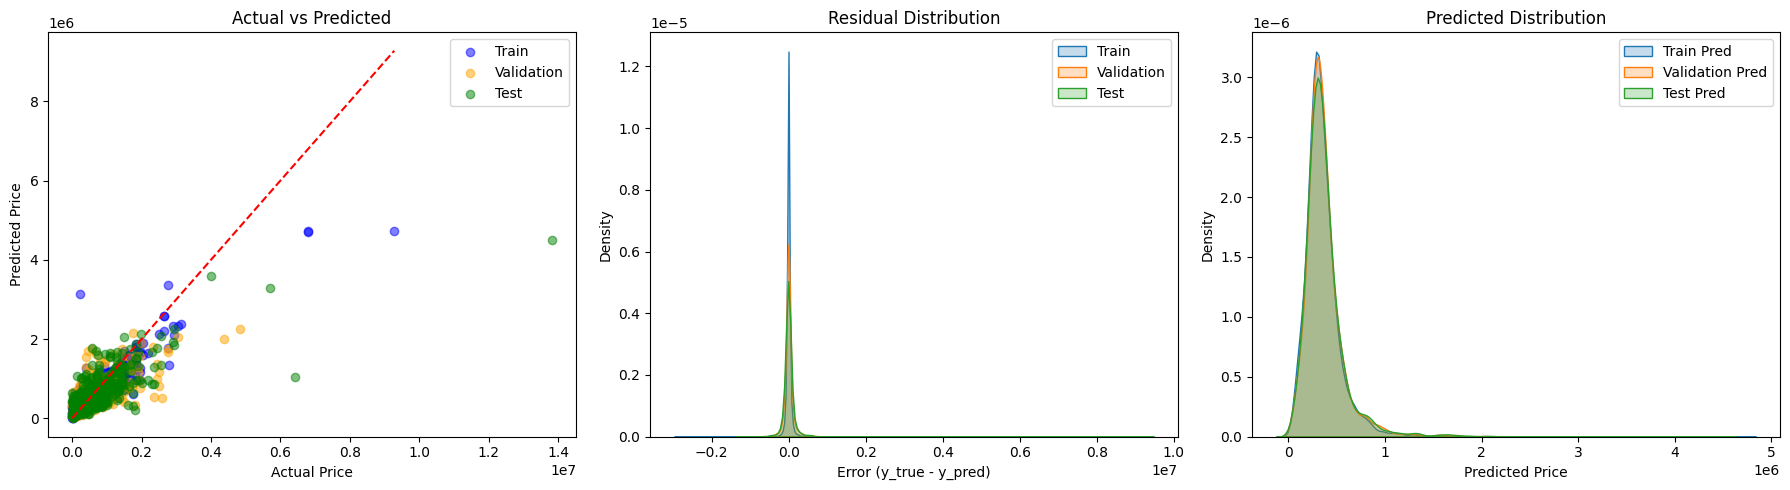

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 8️⃣ Plots
# -----------------------------
plt.figure(figsize=(18,5))

# 8.1 Actual vs Predicted
plt.subplot(1,3,1)
plt.scatter(y_tr, y_train_pred, alpha=0.5, color='blue', label='Train')
plt.scatter(y_val, y_val_pred, alpha=0.5, color='orange', label='Validation')
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green', label='Test')
plt.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.legend()

# 8.2 Residuals (Error Distribution)
plt.subplot(1,3,2)
residuals_train = y_tr - y_train_pred
residuals_val   = y_val - y_val_pred
residuals_test  = y_test - y_test_pred
sns.kdeplot(residuals_train, label='Train', fill=True)
sns.kdeplot(residuals_val, label='Validation', fill=True)
sns.kdeplot(residuals_test, label='Test', fill=True)
plt.title('Residual Distribution')
plt.xlabel('Error (y_true - y_pred)')
plt.legend()

# 8.3 Predicted Values Distribution
plt.subplot(1,3,3)
sns.kdeplot(y_train_pred, label='Train Pred', fill=True)
sns.kdeplot(y_val_pred, label='Validation Pred', fill=True)
sns.kdeplot(y_test_pred, label='Test Pred', fill=True)
plt.title('Predicted Distribution')
plt.xlabel('Predicted Price')
plt.legend()

plt.tight_layout()
plt.show()


In [133]:
from sklearn.ensemble import RandomForestRegressor

# -----------------------------
# 6️⃣ Random Forest Regressor (parametre optimize)
# -----------------------------
rf_model = RandomForestRegressor(
    n_estimators=300,      # ağaç sayısı
    max_depth=25,          # derinlik sınırı
    min_samples_split=5,   # bir düğümün split olabilmesi için minimum örnek
    min_samples_leaf=2,    # yaprakta minimum örnek
    random_state=42,
    n_jobs=-1
)

# Fit
rf_model.fit(X_tr_encoded, y_tr)

# Tahminler
y_train_pred = rf_model.predict(X_tr_encoded)
y_val_pred   = rf_model.predict(X_val_encoded)
y_test_pred  = rf_model.predict(X_test_encoded)

# -----------------------------
# 7️⃣ Değerlendirme
# -----------------------------
def evaluate(y_true, y_pred, label="Set"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} → RMSE: {rmse:.2f}, R²: {r2:.4f}")

evaluate(y_tr, y_train_pred, "Train")
evaluate(y_val, y_val_pred, "Validation")
evaluate(y_test, y_test_pred, "Test")


Train → RMSE: 99748.53, R²: 0.8577
Validation → RMSE: 169330.76, R²: 0.6468
Test → RMSE: 249175.65, R²: 0.6043
